## Overlapping Binary Patterns (OBP) Features

$I$ = intensity
$L$ = kernal size or block size
$$F(g_c) = \sum_{i=0}^7 s(g_i-g_c) \cdot 2^i$$
$$s(x) = \begin{cases}
1 & x\geq 0\\
0 & x\lt 0
\end{cases}$$

for computing $g_0 - g_7$ go round in a circle around $x,y$ from top-left corner

$$
\begin{align*}
g_c &= S_L(x,y) &g_0 &= S_L(x-1,y-1)  &g_1 &= S_L(x,y-1) \\ 
g_2 &= S_L(x+1,y-1) &g_3 &= S_L(x+1,y) &g_4 &= S_L(x+1,y+1)  \\
g_5 &= S_L(x,y+1) &g_6 &= S_L(x-1,y+1) &g_7 &= S_L(x-1,y)
\end{align*}
$$

convolution with identity matrix
$$S_L = \sum_{i=0}^{L-1}\sum_{j=0}^{L-1} I(x+i,y+j)$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def s(x):
    return x>=0

def shift_img(img,x,y):
    img = np.roll(img,y,axis=0)
    img = np.roll(img,x,axis=1)
    if y<0:
        img[y:,:] = 0
    else:
        img[:y,:] = 0
    if x<0:
        img[:,x:] = 0
    else:
        img[:,:x] = 0
    return img
    
def OBP(I,L):
    I = I.astype(np.float32)/255
    kernel = np.ones((L,L))
    gc = cv2.filter2D(I,-1,kernel)
    shifts = [(-1,-1),(0,-1),(1,-1),(1,0),(1,1),(0,1),(-1,1),(-1,0)]
    shifted = [ shift_img(I,-x,-y) for x,y in  shifts]
    gi= np.array([cv2.filter2D(x,-1,kernel) for x in shifted])
    encoder = np.array([2**i for i in range(8)])
    si = s(gi-gc).astype(np.uint8)
    F = np.einsum("i...,i",si,encoder)
    return F


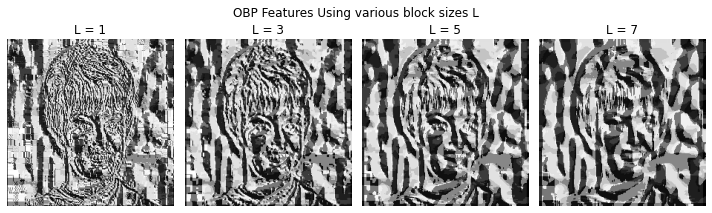

In [3]:
img = cv2.imread("imgs/lady.jpg")
plt.figure(figsize=(10,3),tight_layout=True)
plt.suptitle("OBP Features Using various block sizes L")
for i,L in enumerate(range(1,9,2)):
    obp = OBP(img,L)
    plt.subplot(1,4,i+1)
    plt.title(f"L = {L}")
    plt.axis("off")
    plt.imshow(obp,cmap="gray")